# Problem Statement : (Binary Classification)
## Given the samples of image cells, create a Neural Network model to predict whether a 
## patient is affected by Malaria disease or not

## Importing the required libraries

In [14]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [15]:
print(os.listdir("../input"))

['cell-images-for-detecting-malaria']


In [16]:
print(os.listdir("../input/cell-images-for-detecting-malaria/cell_images/cell_images/"))

['Uninfected', 'Parasitized']


## Path for the Image directory

In [17]:
img_dir = '../input/cell-images-for-detecting-malaria/cell_images/cell_images/'

## Generating extra data from the existing data by using Data Augmentation

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                  validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(img_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(img_dir,
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


## Model Building

In [20]:
model = models.Sequential([
                           layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                           layers.Conv2D(64, (3,3), activation='relu', padding='same'),
                           layers.MaxPooling2D((2,2)),

                           layers.Conv2D(64, (3,3), activation='relu', padding='same'),
                           layers.Conv2D(128, (3,3), activation='relu', padding='same'),
                           layers.MaxPooling2D((2,2)),

                           layers.Conv2D(128, (3,3), activation='relu', padding='same'),
                           layers.MaxPooling2D((2,2)),

                           layers.Dropout((0.3)),
                           layers.Flatten(),

                           layers.Dense(512, activation='relu'),
                           layers.Dense(1, activation='sigmoid')


])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 74, 74, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 74, 74, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 128)      

In [22]:
model.compile(tf.keras.optimizers.Adam(learning_rate=2e-5),
              tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

## Training

In [24]:
history = model.fit(train_generator,
                             steps_per_epoch=689,
                             epochs=20,
                             validation_data=validation_generator,
                            validation_steps=173,
                           callbacks=[callback])

model.save('malaria-detection.h5')

Epoch 1/20
689/689 [==============================] - 293s 424ms/step - loss: 0.6559 - accuracy: 0.6071 - val_loss: 0.5990 - val_accuracy: 0.6860
Epoch 2/20
689/689 [==============================] - 269s 390ms/step - loss: 0.5615 - accuracy: 0.7302 - val_loss: 0.3125 - val_accuracy: 0.8844
Epoch 3/20
689/689 [==============================] - 269s 390ms/step - loss: 0.3335 - accuracy: 0.8661 - val_loss: 0.2630 - val_accuracy: 0.8924
Epoch 4/20
689/689 [==============================] - 271s 393ms/step - loss: 0.2644 - accuracy: 0.9018 - val_loss: 0.2674 - val_accuracy: 0.9138
Epoch 5/20
689/689 [==============================] - 269s 391ms/step - loss: 0.2609 - accuracy: 0.9037 - val_loss: 0.2553 - val_accuracy: 0.9045
Epoch 6/20
689/689 [==============================] - 268s 388ms/step - loss: 0.2426 - accuracy: 0.9137 - val_loss: 0.2411 - val_accuracy: 0.9114
Epoch 7/20
689/689 [==============================] - 268s 388ms/step - loss: 0.2356 - accuracy: 0.9182 - val_loss: 0.2593 -

In [25]:
history.history

{'loss': [0.6343745589256287,
  0.49348336458206177,
  0.31071799993515015,
  0.2702067196369171,
  0.25112760066986084,
  0.24236437678337097,
  0.23523978888988495,
  0.2289699763059616,
  0.22148145735263824,
  0.22332730889320374,
  0.21561793982982635,
  0.21575595438480377,
  0.2134896218776703,
  0.2081911563873291,
  0.2082141488790512,
  0.2029055804014206,
  0.20163896679878235,
  0.19781436026096344,
  0.19633623957633972,
  0.19959716498851776],
 'accuracy': [0.6434597373008728,
  0.7819756865501404,
  0.8799437880516052,
  0.9002177119255066,
  0.9088352918624878,
  0.9155479073524475,
  0.9193577766418457,
  0.9233037233352661,
  0.9247097373008728,
  0.9254354238510132,
  0.9287463426589966,
  0.9282474517822266,
  0.9289731383323669,
  0.9309234619140625,
  0.930605947971344,
  0.9308327436447144,
  0.9331458806991577,
  0.9334179759025574,
  0.9334179759025574,
  0.9327376484870911],
 'val_loss': [0.5990338325500488,
  0.312466025352478,
  0.26297906041145325,
  0.2674

## Results

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

In [27]:
print(f'Training Accuracy : {sum(acc)/len(acc)}')
print(f'Training Loss : {sum(loss)/len(loss)}')
print(f'Validation Accuracy : {sum(val_acc)/len(val_acc)}')
print(f'Validation Loss : {sum(val_loss)/len(val_loss)}')

Training Accuracy : 0.9016917675733567
Training Loss : 0.25854271426796915
Validation Accuracy : 0.90149727165699
Validation Loss : 0.2549665831029415


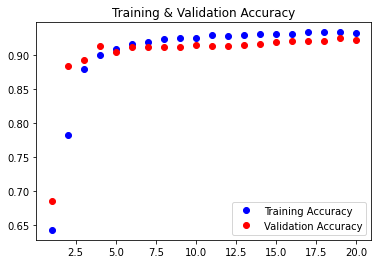

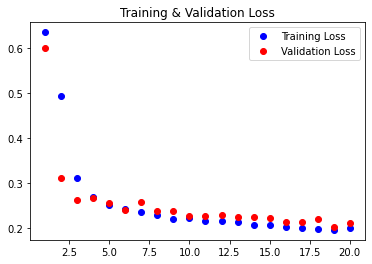

In [28]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'ro', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show() 